In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [11]:
type(data)

In [8]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [9]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\4244551283.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10254,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.941418e+07,1.941418e+07,False,NaN,1,NaN,NaN,None,2023-06-28T11:58:00.000Z,30336.783653,1.583756e+10,1.7999,0.003627,-1.285724,4.713908,8.642023,3.454117,5.847239,5.889636e+11,50.2154,6.370725e+11,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355
1,1027,Ethereum,ETH,ethereum,7037,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201840e+08,1.201840e+08,True,NaN,2,NaN,NaN,None,2023-06-28T11:58:00.000Z,1862.106729,7.672453e+09,-9.1187,-0.027973,-1.057098,1.777314,-2.176421,-1.897405,3.118536,2.237954e+11,19.0843,2.237954e+11,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355
2,825,Tether,USDT,tether,55934,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.324049e+10,8.573353e+10,True,NaN,3,NaN,NaN,None,2023-06-28T11:58:00.000Z,1.000110,2.380647e+10,-3.1387,0.008674,0.015978,-0.012178,-0.007935,-0.052244,0.018178,8.324969e+10,7.0979,8.574300e+10,None,2023-06-28T11:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-28 12:00:43.252355
3,1839,BNB,BNB,bnb,1469,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558517e+08,1.558517e+08,False,NaN,4,NaN,NaN,None,2023-06-28T11:58:00.000Z,233.370495,3.813686e+08,-2.0266,-0.255537,-2.527872,-5.758434,-26.103598,-27.750047,-26.480610,3.637120e+10,3.1015,3.637120e+10,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355
4,3408,USD Coin,USDC,usd-coin,13119,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.818802e+10,2.818802e+10,False,NaN,5,NaN,NaN,None,2023-06-28T11:58:00.000Z,1.000103,3.696738e+09,-1.0397,0.012045,0.013433,-0.027002,0.013100,0.024487,0.042309,2.819091e+10,2.4036,2.819091e+10,None,2023-06-28T11:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-28 12:00:43.252355
5,52,XRP,XRP,xrp,970,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,NaN,NaN,None,2023-06-28T11:58:00.000Z,0.475954,8.022999e+08,-12.1557,-0.015860,-1.008008,-3.840251,-0.924218,-1.094204,-13.518670,2.487062e+10,2.1205,4.759536e+10,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355
6,2010,Cardano,ADA,cardano,845,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.494145e+10,3.592148e+10,False,NaN,7,NaN,NaN,None,2023-06-28T11:58:00.000Z,0.274784,2.230114e+08,7.7053,-0.242854,-3.384652,-1.499541,-27.600327,-31.953145,-27.760384,9.601333e+09,0.8188,1.236526e+10,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.399518e+11,1.399518e+11,True,NaN,8,NaN,NaN,None,2023-06-28T11:58:00.000Z,0.064472,2.197129e+08,-14.4921,-0.003735,-1.500945,0.474451,-11.986846,-20.464751,-14.274898,9.022915e+09,0.7694,9.022915e+09,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355
8,1958,TRON,TRX,tron,774,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, sec-security...",NaN,8.99

In [10]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [11]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\sriram\AppData\Local\Temp\ipykernel_11824\2801686489.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10254,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.941418e+07,1.941418e+07,False,NaN,1,NaN,NaN,None,2023-06-28T11:58:00.000Z,30336.783653,1.583756e+10,1.7999,0.003627,-1.285724,4.713908,8.642023,3.454117,5.847239,5.889636e+11,50.2154,6.370725e+11,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355,NaT
1,1027,Ethereum,ETH,ethereum,7037,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201840e+08,1.201840e+08,True,NaN,2,NaN,NaN,None,2023-06-28T11:58:00.000Z,1862.106729,7.672453e+09,-9.1187,-0.027973,-1.057098,1.777314,-2.176421,-1.897405,3.118536,2.237954e+11,19.0843,2.237954e+11,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355,NaT
2,825,Tether,USDT,tether,55934,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.324049e+10,8.573353e+10,True,NaN,3,NaN,NaN,None,2023-06-28T11:58:00.000Z,1.000110,2.380647e+10,-3.1387,0.008674,0.015978,-0.012178,-0.007935,-0.052244,0.018178,8.324969e+10,7.0979,8.574300e+10,None,2023-06-28T11:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-28 12:00:43.252355,NaT
3,1839,BNB,BNB,bnb,1469,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558517e+08,1.558517e+08,False,NaN,4,NaN,NaN,None,2023-06-28T11:58:00.000Z,233.370495,3.813686e+08,-2.0266,-0.255537,-2.527872,-5.758434,-26.103598,-27.750047,-26.480610,3.637120e+10,3.1015,3.637120e+10,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355,NaT
4,3408,USD Coin,USDC,usd-coin,13119,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.818802e+10,2.818802e+10,False,NaN,5,NaN,NaN,None,2023-06-28T11:58:00.000Z,1.000103,3.696738e+09,-1.0397,0.012045,0.013433,-0.027002,0.013100,0.024487,0.042309,2.819091e+10,2.4036,2.819091e+10,None,2023-06-28T11:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-28 12:00:43.252355,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2,Litecoin,LTC,litecoin,927,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",8.400000e+07,7.324446e+07,8.400000e+07,False,NaN,11,NaN,NaN,None,2023-06-28T12:14:00.000Z,85.679791,4.459879e+08,-14.5729,-0.360245,-3.668493,1.516313,-6.517050,-4.825102,-4.801428,6.275570e+09,0.5358,7.197102e+09,None,2023-06-28T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-06-28 12:16:14.057552
11,6636,Polkadot,DOT,polkadot-new,518,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.214074e+09,1.328698e+09,True,NaN,12,NaN,NaN,None,2023-06-28T12:14:00.000Z,4.992435,1.078006e+08,-24.3819,-0.183451,-2.617464,6.389695,-9.026956,-16.661986,-18.863502,6.061185e+09,0.5174,6.633438e+09,None,2023-06-28T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-06-28 12:16:14.057552
12,3890,Polygon,MATIC,polygon,751,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",1.000000e+10,9.319469e+09,1.000000e+10,False,NaN,13,NaN,NaN,None,2023-06-28T12:14:00.000Z,0.630957,3.008556e+08,18.1708,-0.458960,-5.519640,-2.400497,-32.135647,-37.302990,-43.241532,5.880181e+0

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10254,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19414175.00000,19414175.00000,False,NaN,1,NaN,NaN,None,2023-06-28T11:58:00.000Z,30336.78365,15837561490.48210,1.79990,0.00363,-1.28572,4.71391,8.64202,3.45412,5.84724,588963626771.71167,50.21540,637072456707.83997,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355,NaT
1,1027,Ethereum,ETH,ethereum,7037,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120184000.29419,120184000.29419,True,NaN,2,NaN,NaN,None,2023-06-28T11:58:00.000Z,1862.10673,7672453062.82538,-9.11870,-0.02797,-1.05710,1.77731,-2.17642,-1.89741,3.11854,223795435700.52972,19.08430,223795435700.53000,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355,NaT
2,825,Tether,USDT,tether,55934,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83240489455.15042,85733529362.29857,True,NaN,3,NaN,NaN,None,2023-06-28T11:58:00.000Z,1.00011,23806466022.74777,-3.13870,0.00867,0.01598,-0.01218,-0.00794,-0.05224,0.01818,83249686172.60754,7.09790,85743001520.03000,None,2023-06-28T11:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-28 12:00:43.252355,NaT
3,1839,BNB,BNB,bnb,1469,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155851741.18505,155851741.18505,False,NaN,4,NaN,NaN,None,2023-06-28T11:58:00.000Z,233.37049,381368568.51183,-2.02660,-0.25554,-2.52787,-5.75843,-26.10360,-27.75005,-26.48061,36371197946.58530,3.10150,36371197946.59000,None,2023-06-28T11:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-28 12:00:43.252355,NaT
4,3408,USD Coin,USDC,usd-coin,13119,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28188020219.82820,28188020219.82820,False,NaN,5,NaN,NaN,None,2023-06-28T11:58:00.000Z,1.00010,3696738299.00581,-1.03970,0.01205,0.01343,-0.02700,0.01310,0.02449,0.04231,28190913519.87778,2.40360,28190913519.88000,None,2023-06-28T11:58:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-28 12:00:43.252355,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2,Litecoin,LTC,litecoin,927,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.00000,73244464.22744,84000000.00000,False,NaN,11,NaN,NaN,None,2023-06-28T12:14:00.000Z,85.67979,445987870.79760,-14.57290,-0.36024,-3.66849,1.51631,-6.51705,-4.82510,-4.80143,6275570378.45136,0.53580,7197102434.30000,None,2023-06-28T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-06-28 12:16:14.057552
11,6636,Polkadot,DOT,polkadot-new,518,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1214073778.37979,1328697827.13397,True,NaN,12,NaN,NaN,None,2023-06-28T12:14:00.000Z,4.99244,107800596.38443,-24.38190,-0.18345,-2.61746,6.38970,-9.02696,-16.66199,-18.86350,6061184810.66704,0.51740,6633437960.04000,None,2023-06-28T12:14:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-06-28 12:16:14.057552
12,3890,Polygon,MATIC,polygon,751,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",10000000000.00000,9319469069.28493,10000000000.00000,False,NaN,13,NaN,Na

In [14]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.14765,-1.37429,4.64744,8.48606,3.28233,5.91404
Ethereum,-0.07552,-1.05678,1.65229,-2.20487,-1.95693,3.34691
Tether,0.01865,0.02026,0.00792,-0.01141,-0.05351,0.01238
BNB,-0.26658,-2.46071,-5.81097,-26.17544,-27.73493,-26.32561
USD Coin,0.01973,0.02331,-0.00340,0.01197,0.02040,0.04234
XRP,-0.22761,-1.17577,-3.99062,-1.08313,-1.23923,-12.56324
Cardano,-0.51833,-3.47534,-1.67235,-27.74987,-32.03771,-27.76478
Dogecoin,-0.25308,-1.66117,0.36573,-12.20313,-20.59301,-14.20985
TRON,-0.12018,-0.89394,4.68703,-4.71421,10.28414,14.40935


In [15]:
df4 = df3.stack()
df4


name                                 
Bitcoin  quote.USD.percent_change_1h     -0.14765
         quote.USD.percent_change_24h    -1.37429
         quote.USD.percent_change_7d      4.64744
         quote.USD.percent_change_30d     8.48606
         quote.USD.percent_change_60d     3.28233
                                           ...   
Toncoin  quote.USD.percent_change_24h    -5.03016
         quote.USD.percent_change_7d     -1.76187
         quote.USD.percent_change_30d   -27.71525
         quote.USD.percent_change_60d   -36.56116
         quote.USD.percent_change_90d   -33.88056
Length: 90, dtype: float64

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.14765
        quote.USD.percent_change_24h  -1.37429
        quote.USD.percent_change_7d    4.64744
        quote.USD.percent_change_30d   8.48606
        quote.USD.percent_change_60d   3.28233
...                                        ...
Toncoin quote.USD.percent_change_24h  -5.03016
        quote.USD.percent_change_7d   -1.76187
        quote.USD.percent_change_30d -27.71525
        quote.USD.percent_change_60d -36.56116
        quote.USD.percent_change_90d -33.88056

[90 rows x 1 columns]

In [21]:
index = pd.Index(range(90))


df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.14765
1,Bitcoin,quote.USD.percent_change_24h,-1.37429
2,Bitcoin,quote.USD.percent_change_7d,4.64744
3,Bitcoin,quote.USD.percent_change_30d,8.48606
4,Bitcoin,quote.USD.percent_change_60d,3.28233
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-5.03016
86,Toncoin,quote.USD.percent_change_7d,-1.76187
87,Toncoin,quote.USD.percent_change_30d,-27.71525
88,Toncoin,quote.USD.percent_change_60d,-36.56116


In [22]:

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.14765
1,Bitcoin,quote.USD.percent_change_24h,-1.37429
2,Bitcoin,quote.USD.percent_change_7d,4.64744
3,Bitcoin,quote.USD.percent_change_30d,8.48606
4,Bitcoin,quote.USD.percent_change_60d,3.28233
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-5.03016
86,Toncoin,quote.USD.percent_change_7d,-1.76187
87,Toncoin,quote.USD.percent_change_30d,-27.71525
88,Toncoin,quote.USD.percent_change_60d,-36.56116


In [23]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.14765
1,Bitcoin,24h,-1.37429
2,Bitcoin,7d,4.64744
3,Bitcoin,30d,8.48606
4,Bitcoin,60d,3.28233
...,...,...,...
85,Toncoin,24h,-5.03016
86,Toncoin,7d,-1.76187
87,Toncoin,30d,-27.71525
88,Toncoin,60d,-36.56116


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


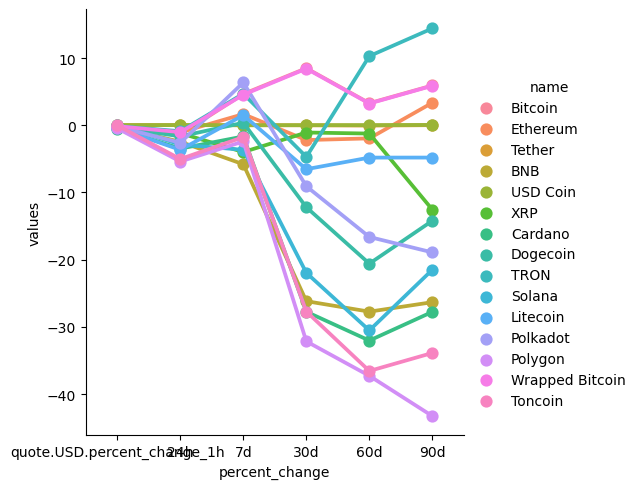

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [28]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10


,name,quote.USD.price,timestamp
0,Bitcoin,30336.78365,2023-06-28 12:00:43.252355
0,Bitcoin,30300.25965,NaT
0,Bitcoin,30300.22004,NaT
0,Bitcoin,30293.34986,NaT
0,Bitcoin,30289.76994,NaT
0,Bitcoin,30288.26435,NaT
0,Bitcoin,30290.11538,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

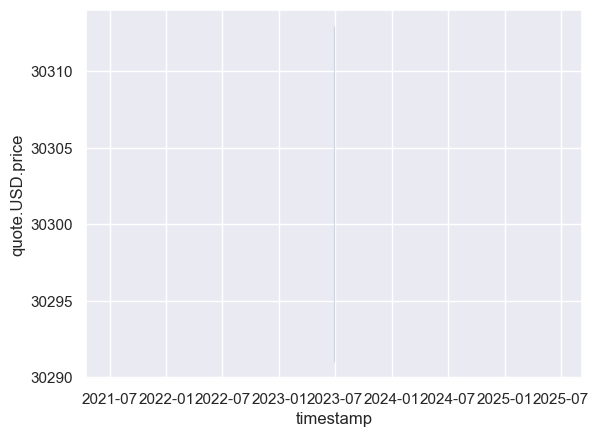

In [30]:


sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)